In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

In [2]:
#prepare separate tables containing RNA_Prints, Ribo_Prints and Ribo_Densities for each GEO Dataset
genes = pd.read_csv('sacCer3 genes.csv')[['name','length']]
genes.columns = ['ORF','length']
ref_RNAs = pd.read_csv('RNA_reference.csv')
datasets = pd.read_csv('Dataset_clusters.csv')
RNA_dats,Ribo_dats,RperR_dats = genes[['ORF',]],genes[['ORF',]],genes[['ORF',]]
dataset_list,cluster_list = [],[],
for dataset in datasets['Dataset']:
    this_set = pd.read_csv(dataset + '.csv')
    if 'RNA_Prints' not in this_set.columns:
        this_set = this_set.merge(ref_RNAs, how='inner',on='ORF')
    this_set = genes.merge(this_set,how='inner',on='ORF')
    this_set['RNA_RPKM'] = this_set['RNA_Prints'] / (this_set['length'] / 1000)
    this_set['RNAs'] = this_set['RNA_RPKM']/this_set['RNA_RPKM'].sum()*60000
    this_set['Ribos'] = this_set['Ribo_Prints']/this_set['Ribo_Prints'].sum()*170000
    this_set['RperR'] = (this_set['Ribos'] / this_set['RNAs'])
    RNA_dats = RNA_dats.merge(this_set[['ORF','RNAs']],how='inner',on='ORF')
    Ribo_dats = Ribo_dats.merge(this_set[['ORF','Ribos']],how='inner',on='ORF')
    RperR_dats = RperR_dats.merge(this_set[['ORF','RperR']],how='inner',on='ORF')
    dataset_list.append(dataset)
    cluster_list.append(datasets.loc[datasets['Dataset'] == dataset]['Cluster No'].values[0])
Ribo_dats = Ribo_dats.replace((-np.inf,np.inf),np.nan).dropna()
RNA_dats = RNA_dats.replace((-np.inf,np.inf),np.nan).dropna()
RperR_dats = RperR_dats.replace((-np.inf,np.inf),np.nan).dropna()
Ribo_dats = np.transpose(np.array(Ribo_dats.iloc[:,1:]))
RNA_dats = np.transpose(np.array(RNA_dats.iloc[:,1:]))
RperR_dats = np.transpose(np.array(RperR_dats.iloc[:,1:]))
col_list = []
for item in cluster_list:
    if item == 1:
        col_list.append('blue')
    elif item == 2:
        col_list.append('red')
    elif item == 3:
        col_list.append('orange')
    elif item == 4:
        col_list.append('green')

In [3]:
repeats = 50
RNAs,Ribos,RperRs = np.array([[0,0]]),np.array([[0,0]]),np.array([[0,0]])

for n in range(repeats):
    Ribo_tsne = TSNE().fit_transform(Ribo_dats)
    Ribos = np.append(Ribos,Ribo_tsne,axis=0)
    RNA_tsne = TSNE().fit_transform(RNA_dats)
    RNAs = np.append(RNAs,RNA_tsne,axis=0)
    RperR_tsne = TSNE().fit_transform(RperR_dats)
    RperRs = np.append(RperRs,RperR_tsne,axis=0)


Ribos = Ribos[1:,:]
RNAs=RNAs[1:,:]
RperRs=RperRs[1:,:]


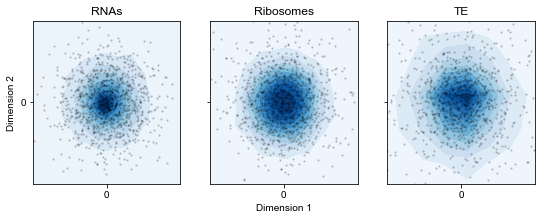

In [4]:
import seaborn as sns
fig,ax = plt.subplots(1,3,sharey=True,sharex=True,figsize=(9,3))
sns.set_style("white")
sns.kdeplot(RNAs[:,0],RNAs[:,1], ax=ax[0],cmap='Blues',shade=True)
ax[0].scatter(RNAs[:1000,0],RNAs[:1000,1],s=2,c='black',alpha=0.15),ax[0].set_title('RNAs')
ax[0].set_ylabel('Dimension 2')
sns.kdeplot(Ribos[:,0],Ribos[:,1], ax=ax[1],cmap='Blues',shade=True)
ax[1].scatter(Ribos[:1000,0],Ribos[:1000,1],s=2,c='black',alpha=0.15),ax[1].set_title('Ribosomes')
ax[1].set_xlabel('Dimension 1')
sns.kdeplot(RperRs[:,0],RperRs[:,1], ax=ax[2],cmap='Blues',shade=True)
ax[2].scatter(RperRs[:1000,0],RperRs[:1000,1],s=2,c='black',alpha=0.15),ax[2].set_title('TE')
ax[0].set_xlim((-250,+250)), ax[0].set_ylim((-250,+250)), ax[0].set_yticks([0]), ax[0].set_xticks([0])
#plt.savefig('Dataset_Similarities.svg')
plt.show()